<a href="https://colab.research.google.com/github/RigoArias/MetodosComputacionales_RigoArias_DarcyGaleano/blob/main/Tarea%203/Taller_3_Integracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

###                ###
###     PUNTO 5    ###
###                ###

import numpy as np
def f(x):
    return np.exp(-x**2)

def metodo_trapecio(a, b, n):
    h = (b - a) / n  # Paso
    suma = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        suma += f(a + i * h)
    return h * suma

a = 0
b = 1
error_deseado = 0.005

def calcular_n_puntos(a, b, error_deseado):
    n = 1
    error = 1
    integral_anterior = 0

    while error > error_deseado:
        n += 1
        integral_actual = metodo_trapecio(a, b, n)
        error = abs(integral_actual - integral_anterior)
        integral_anterior = integral_actual

    return n, integral_actual

n, resultado = calcular_n_puntos(a, b, error_deseado)

print(f"El número de puntos requerido es: {n}")
print(f"El valor aproximado de la integral es: {resultado:.6f}")

El número de puntos requerido es: 4
El valor aproximado de la integral es: 0.742984


In [4]:

###                ###
###     PUNTO 6    ###
###                ###

import numpy as np
import scipy.integrate as spi
import math

R = 0.5
a = 0.01

def f(x):
    return np.sqrt(a**2 - x**2) / (R + x)

valor_exacto = np.pi * (R - np.sqrt(R**2 - a**2))

def trapecio(f, a, b, n):
    h = (b - a) / n
    suma = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        suma += f(a + i * h)
    return h * suma

def simpson(f, a, b, n):
    if n % 2 == 1:
        n += 1
    h = (b - a) / n
    suma = f(a) + f(b)
    for i in range(1, n, 2):
        suma += 4 * f(a + i * h)
    for i in range(2, n - 1, 2):
        suma += 2 * f(a + i * h)
    return h / 3 * suma

lim_a = -a
lim_b = a

n_trapecio = 10
n_simpson = 10

resultado_trapecio = trapecio(f, lim_a, lim_b, n_trapecio)
resultado_simpson = simpson(f, lim_a, lim_b, n_simpson)

error_trapecio = abs((resultado_trapecio - valor_exacto) / valor_exacto) * 100
error_simpson = abs((resultado_simpson - valor_exacto) / valor_exacto) * 100

while error_trapecio > 0.5:
    n_trapecio += 10
    resultado_trapecio = trapecio(f, lim_a, lim_b, n_trapecio)
    error_trapecio = abs((resultado_trapecio - valor_exacto) / valor_exacto) * 100

while error_simpson > 0.5:
    n_simpson += 10
    resultado_simpson = simpson(f, lim_a, lim_b, n_simpson)
    error_simpson = abs((resultado_simpson - valor_exacto) / valor_exacto) * 100

print(f"Resultado exacto: {valor_exacto:.8f}")
print(f"Resultado método del trapecio: {resultado_trapecio:.8f}, con error: {error_trapecio:.8f}%")
print(f"Resultado regla de Simpson: {resultado_simpson:.8f}, con error: {error_simpson:.8f}%")

Resultado exacto: 0.00031419
Resultado método del trapecio: 0.00031288, con error: 0.41799335%
Resultado regla de Simpson: 0.00031273, con error: 0.46438533%


volumen aproximado: 2.0938469983337344
volumen teórico: 2.0943951023931953
error: 0.0005481040594608189


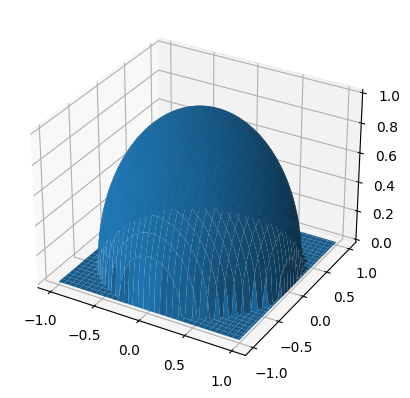

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

 ###                ###
 ###     PUNTO 7    ###
 ###                ###

R = 1
n = 100
x = np.linspace(-R, R, n + 1)
y = np.linspace(-R, R, n + 1)
X, Y = np.meshgrid(x, y)

def z_axis(x, y):
    inside_circle = x**2 + y**2 <= R**2
    z = np.sqrt(np.maximum(R**2 - x**2 - y**2, 0))
    return np.where(inside_circle, z, 0.)

z = z_axis(X, Y)
dx = 2*R / n
dy = 2*R / n
area_cuadrado = dx * dy

volumen = 0
for i in range(n):
    for j in range(n):
        promedio = (z[i,j] + z[i+1,j] + z[i,j+1] + z[i+1,j+1]) / 4
        volumen += abs(promedio * area_cuadrado)

print(f"volumen aproximado: {volumen}")
volumen_teorico = (2/3) * np.pi * R**3
print(f"volumen teórico: {volumen_teorico}")
error = abs(volumen_teorico - volumen)
print(f"error: {error}")


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, z)


In [6]:

 ###                ###
 ###     PUNTO 9    ###
 ###                ###


x, a, b, h = sp.symbols('x a b h')

L0 = (x-h)*(x-2*h)*(x-3*h) / (-h*(-2*h)*(-3*h))
L1 = x*(x-2*h)*(x-3*h) / (h*(-h)*(-2*h))
L2 = x*(x-h)*(x-3*h) / ((2*h)*h*(-h))
L3 = x*(x-h)*(x-2*h) / ((3*h)*(2*h)*h)

I0 = sp.integrate(L0, (x, 0, 3*h))
I1 = sp.integrate(L1, (x, 0, 3*h))
I2 = sp.integrate(L2, (x, 0, 3*h))
I3 = sp.integrate(L3, (x, 0, 3*h))

print("a)")
print(f"I0 = {I0}")
print(f"I1 = {I1}")
print(f"I2 = {I2}")
print(f"I3 = {I3}")

f = sp.Function('f')
simpson_3_8 = 3*h/8 * (f(a) + 3*f(a+h) + 3*f(a+2*h) + f(b))

h_substituted = (b-a)/3

punto_intermedio_1 = a + h_substituted
punto_intermedio_2 = a + 2*h_substituted

print("\n")
print("b)")
print(f"Primer punto intermedio: {punto_intermedio_1.simplify()}")
print(f"Segundo punto intermedio: {punto_intermedio_2.simplify()}")

a)
I0 = 3*h/8
I1 = 9*h/8
I2 = 9*h/8
I3 = 3*h/8


b)
Primer punto intermedio: 2*a/3 + b/3
Segundo punto intermedio: a/3 + 2*b/3


In [7]:

 ###                 ###
 ###     PUNTO 10    ###
 ###                 ###

"La integral de una funcion f(x) en el intervalo a y b, se puede plantear como la integral de P(x) en el intervalo a y b de la siguiente foma:"

"∫ₐᵇ  P(x) dx "

"Donde P(x) el es polinomio cubico de Lagrange con nodos: a, a+h, a+2h, a+3h"

"El error viene de la diferencia de la integral de la diferencia entre P(x) y f(x), de la forma"

"∫ₐᵇ  f(x) - P(x) dx = ∫ₐᵇ (f⁽⁴⁾(ξ)/(n+1)!) (x - x₀)(x - x₁)(x - x₂)(x - x₃)dx"

"Como (f⁽⁴⁾(ξ)/4!) es contante se puede sacar de la integral, quedando de la siguiente forma:"

"∫ₐᵇ  f(x) - P(x) dx = f⁽⁴⁾(ξ)/4! ∫ₐᵇ (x - x₀)(x - x₁)(x - x₂)(x - x₃)dx"

"Reemplazando los puntos x₀, x₁, x₂, x₃ por los nodos:"

"∫ₐᵇ  f(x) - P(x) dx = f⁽⁴⁾(ξ)/4! ∫ₐᵇ (x - a)(x - a-h)(x - a-2h)(x - a-3h)dx"

"Entendiendo que: b-a = 3h y sustituyendo en la integral x' = (x-a)/h ademas dx = hx', entonces:"

"∫ₐᵇ  f(x) - P(x) dx = f⁽⁴⁾(ξ)/4! ∫₀³ h(hx')(hx' - h)(hx' - 2h)(x' - 3h)dx"

"Sacando factor comun h y resolviendo la integral se optiene:"

x = sp.symbols('x')
integrand = x * (x - 1) * (x - 2) * (x - 3)
integral_result = sp.integrate(integrand, (x, 0, 3))
print(integral_result)

"∫ₐᵇ  f(x) - P(x) dx = f⁽⁴⁾(ξ)/4! (h⁵)(-9/10)"

"Al resolver: "

"∫ₐᵇ  f(x) - P(x) dx = E = f⁽⁴⁾(ξ)h⁵(-3/80)"

-9/10


'∫ₐᵇ  f(x) - P(x) dx = E = f⁽⁴⁾(ξ)h⁵(-3/80)'

In [8]:

 ###                 ###
 ###     PUNTO 15    ###
 ###                 ###

def legendre_zeros_weights(n):

  x = sp.symbols('x')
  Pn = sp.legendre(n, x)
  zeros = sp.nroots(Pn, n=n)
  Pn_prime = sp.diff(Pn, x)

  weights = []
  for xi in zeros:
      wi = 2 / ((1 - xi**2) * (Pn_prime.subs(x, xi))**2)
      weights.append(wi)

  return zeros, weights

for n in range(1, 21):
  zeros, weights = legendre_zeros_weights(n)
  print("Polinomio de Legendre de grado:", n)
  print("Zeros:", zeros)
  print("Weights:", weights)
  print("\n")


Polinomio de Legendre de grado: 1
Zeros: [0]
Weights: [2]


Polinomio de Legendre de grado: 2
Zeros: [-0.58, 0.58]
Weights: [1.0, 1.0]


Polinomio de Legendre de grado: 3
Zeros: [-0.775, 0, 0.775]
Weights: [0.556, 8/9, 0.556]


Polinomio de Legendre de grado: 4
Zeros: [-0.8611, -0.3400, 0.3400, 0.8611]
Weights: [0.3479, 0.6521, 0.6521, 0.3479]


Polinomio de Legendre de grado: 5
Zeros: [-0.90618, -0.53847, 0, 0.53847, 0.90618]
Weights: [0.23693, 0.47863, 128/225, 0.47863, 0.23693]


Polinomio de Legendre de grado: 6
Zeros: [-0.932469, -0.661209, -0.238619, 0.238619, 0.661209, 0.932469]
Weights: [0.171325, 0.360762, 0.467914, 0.467914, 0.360762, 0.171325]


Polinomio de Legendre de grado: 7
Zeros: [-0.9491079, -0.7415312, -0.4058452, 0, 0.4058452, 0.7415312, 0.9491079]
Weights: [0.1294850, 0.2797054, 0.3818301, 512/1225, 0.3818301, 0.2797054, 0.1294850]


Polinomio de Legendre de grado: 8
Zeros: [-0.96028986, -0.79666648, -0.52553241, -0.18343464, 0.18343464, 0.52553241, 0.79666648, 0.9

In [9]:

###                 ###
###     PUNTO 16    ###
###                 ###

import numpy as np

def f1(x):
    return 1 / (x**4 + 1)

def f2(t):
    return t**2 / (1 + t**4)
def gauss_legendre(f, n):
    x, w = np.polynomial.legendre.leggauss(n)
    integral = sum(w[i] * f(0.5 * (x[i] + 1)) for i in range(n)) * 0.5
    return integral

# Estimaciones
integral1 = gauss_legendre(f1, 2)
integral2 = gauss_legendre(f2, 2)

# Resultado total
resul = integral1 + integral2
print(f"Estimación de la integral: {resul}")

Estimación de la integral: 1.1060521932259857


xk:  [0.58578644 3.41421356]
wk:  [0.85355339 0.14644661]
xk:  [0.41577456 2.29428036 6.28994508]
wk:  [0.71109301 0.27851773 0.01038926]
xk:  [0.32254769 1.7457611  4.5366203  9.39507091]
wk:  [6.03154104e-01 3.57418692e-01 3.88879085e-02 5.39294706e-04]
xk:  [ 0.26356032  1.41340306  3.59642577  7.08581001 12.64080084]
wk:  [5.21755611e-01 3.98666811e-01 7.59424497e-02 3.61175868e-03
 2.33699724e-05]
xk:  [ 0.2228466   1.1889321   2.99273633  5.77514357  9.83746742 15.98287398]
wk:  [4.58964674e-01 4.17000831e-01 1.13373382e-01 1.03991975e-02
 2.61017203e-04 8.98547906e-07]
xk:  [ 0.19304368  1.0266649   2.56787674  4.90035308  8.18215344 12.73418029
 19.39572786]
wk:  [4.09318952e-01 4.21831278e-01 1.47126349e-01 2.06335145e-02
 1.07401014e-03 1.58654643e-05 3.17031548e-08]
xk:  [ 0.17027963  0.90370178  2.25108663  4.26670017  7.0459054  10.75851601
 15.74067864 22.86313174]
wk:  [3.69188589e-01 4.18786781e-01 1.75794987e-01 3.33434923e-02
 2.79453624e-03 9.07650877e-05 8.48574672e

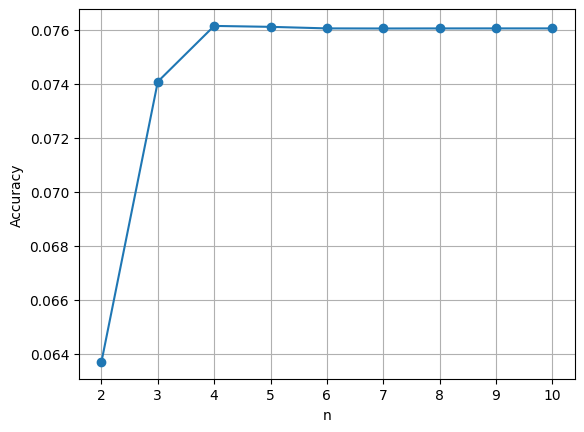

In [12]:

 ###                 ###
 ###     PUNTO 17    ###
 ###                 ###

from scipy.special import roots_laguerre

I_exact = (np.pi**4) / 15

def gauss_laguerre_quadrature(n):

    xk, wk = roots_laguerre(n)
    print("xk: ",xk)
    print("wk: ",wk)
    def f(x):
        return (x**3) / (np.exp(x) - 1)
    I_approx = np.sum(wk * f(xk))
    return I_approx

n_points = np.arange(2, 11)
accuracies = []
estimated_integrals = []

for n in n_points:
    I_estimated = gauss_laguerre_quadrature(n)
    estimated_integrals.append(I_estimated)
    relative_error = (I_estimated - I_exact)/ I_exact
    accuracy = 1 - np.abs(relative_error)
    accuracies.append(accuracy)


plt.plot(n_points, accuracies, marker='o')
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.grid(True)


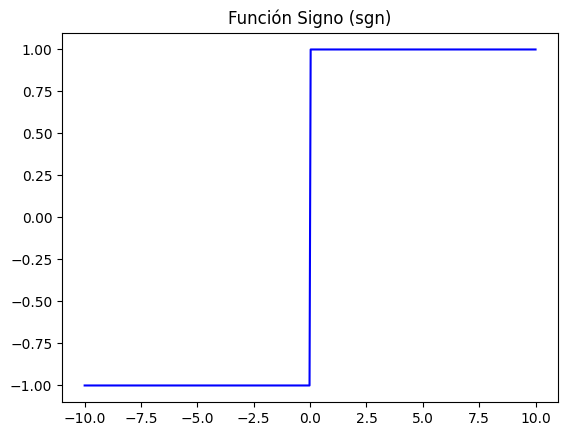

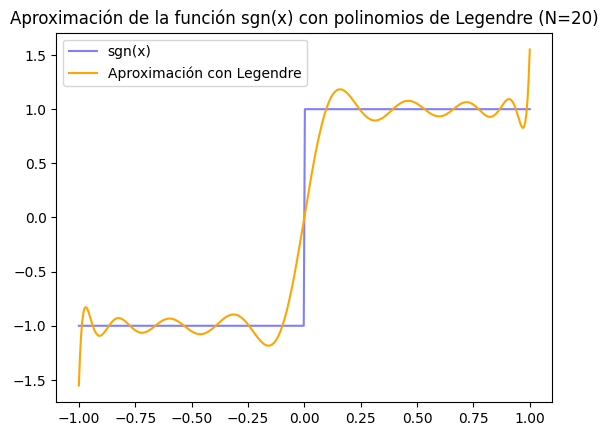

In [ ]:

###                 ###
###     PUNTO 21    ###
###                 ###

import numpy as np
import matplotlib.pyplot as plt
def sgn(x):
    return np.where(x < 0, -1, np.where(x > 0, 1, 0))

def grafica_sgn():
    x_values = np.linspace(-10, 10, 400)
    y_values = sgn(x_values)
    plt.plot(x_values, y_values, label='sgn(x)', color='blue')
    plt.title('Función Signo (sgn)')
    plt.show()
def gauss_legendre(n):
    puntos, pesos = np.polynomial.legendre.laggauss(n)
    return puntos, pesos
def guardar_polinomios(N):
    polinomios_legendre = {}
    for n in range(N + 1):
        polinomios_legendre[n] = np.polynomial.legendre.Legendre.basis(n)
    np.save('polinomios_legendre.npy', polinomios_legendre)

def calcular_coeficientes(f, N):
    coeficientes = np.zeros(N + 1)
    for n in range(N + 1):
        P_n = np.polynomial.legendre.Legendre.basis(n)
        coeficientes[n] = (2 * n + 1) / 2 * np.trapz(f(np.linspace(-1, 1, 100)) * P_n(np.linspace(-1, 1, 100)),
                                                     np.linspace(-1, 1, 100))
    return coeficientes
def combinacion_lineal(coeficientes, x_values):
    N = len(coeficientes) - 1
    f_approx = np.zeros_like(x_values)

    for n in range(N + 1):
        P_n = np.polynomial.legendre.Legendre.basis(n)
        f_approx += coeficientes[n] * P_n(x_values)

    return f_approx
def plot_representacion_legendre(N):
    x_values = np.linspace(-1, 1, 400)
    coeficientes = calcular_coeficientes(sgn, N)
    f_approx = combinacion_lineal(coeficientes, x_values)


    plt.plot(x_values, sgn(x_values), label='sgn(x)', color='blue', alpha=0.5)
    plt.plot(x_values, f_approx, label='Aproximación con Legendre', color='orange')
    plt.title(f'Aproximación de la función sgn(x) con polinomios de Legendre (N={N})')
    plt.legend()
    plt.show()
N = 20
grafica_sgn()
guardar_polinomios(N)
coeficientes = calcular_coeficientes(sgn, N)
plot_representacion_legendre(N)

In [14]:
import numpy as np
import sympy as sym
import math

def GetNewtonMethod(f, df, xn, itmax=10000, precision=1e-14):
    error = 1.0
    it = 0
    while error >= precision and it < itmax:
        try:
            fx = f(xn)
            dfx = df(xn)
            if dfx == 0:
                print("Zero derivative encountered")
                return False
            xn1 = xn - fx / dfx
            error = np.abs((xn1 - xn) / xn)
        except ZeroDivisionError:
            print("Zero division encountered in calculation")
            return False
        xn = xn1
        it += 1
    if it == itmax:
        return False
    else:
        return xn

def GetLaguerre(n):
    x = sym.Symbol('x', Real=True)
    y = sym.exp(-x) * x**n
    L = sym.exp(x) * sym.diff(y, x, n) / math.factorial(n)
    return L

Laguerre = []
DLaguerre = []

x = sym.Symbol('x', Real=True)
n = 2

for i in range(n + 1):
    poly = GetLaguerre(i)
    Laguerre.append(poly)
    DLaguerre.append(sym.diff(poly, x))

def GetAllRoots(f, df, x, tolerancia=13):
    Roots = []
    for i in x:
        root = GetNewtonMethod(f, df, i)
        if root is not False:
            croot = np.round(root, tolerancia)
            if croot not in Roots:
                Roots.append(croot)
    return np.array(sorted(Roots))

def GetRootsPolynomial(n, xi, poly, dpoly):
    x = sym.Symbol('x', Real=True)
    pn = sym.lambdify([x], poly[n], 'numpy')
    dpn = sym.lambdify([x], dpoly[n], 'numpy')
    Roots = GetAllRoots(pn, dpn, xi)
    return Roots

xi = np.linspace(0, 20, 100, dtype=np.longdouble)
Roots = GetRootsPolynomial(n, xi, Laguerre, DLaguerre)

def GetWeightsLaguerre(n, Roots, DPoly):
    Weights = []
    x = sym.Symbol('x', real=True)
    dpn = sym.lambdify([x], DPoly[n], 'numpy')

    for r in Roots:
        weight = r / ((dpn(r))**2)
        Weights.append(weight)

    return np.array(Weights)

Weights = GetWeightsLaguerre(n, Roots, DLaguerre)

print("Raíces y pesos con n:", n)
print("Roots:", Roots)
print("Weights:", Weights)

def gauss_laguerre_quadrature(n):

    xk = GetRootsPolynomial(n, xi, Laguerre, DLaguerre)
    wk = GetWeightsLaguerre(n, Roots, DLaguerre)

    def f(x):
        return (x**3) / (np.exp(x)-1)

    I_approx = np.sum(wk * f(xk))
    return I_approx


Raíces y pesos con n: 2
Roots: [0.58578644 3.41421356]
Weights: [0.29289322 1.70710678]


<ipython-input-14-f58ea66f9920>:16: RuntimeWarning: divide by zero encountered in scalar divide
  error = np.abs((xn1 - xn) / xn)
